<a href="https://colab.research.google.com/github/tajul78/MHIA/blob/main/BC_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:
%cd '/content/drive/My Drive/Colab Notebooks/HIA/'

/content/drive/My Drive/Colab Notebooks/HIA


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
dataset=pd.read_csv('breast-cancer-dataset.csv')

In [6]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
dataset=dataset.drop(columns="Unnamed: 32")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 32)


In [11]:
dataset.isnull().sum()
dataset.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
dataset.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [14]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
dataset['diagnosis'].describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [17]:
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [18]:
dataset['diagnosis'].value_counts(ascending=True)

M    212
B    357
Name: diagnosis, dtype: int64

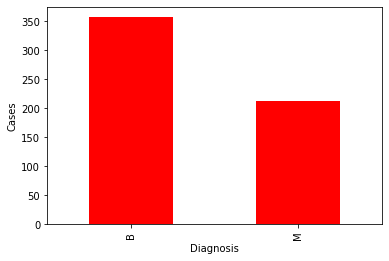

In [19]:
dataset['diagnosis'].value_counts().plot(kind='bar',color='red')
plt.xlabel('Diagnosis')
plt.ylabel('Cases')
plt.show()

In [20]:
dataset['radius_mean'].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

In [21]:
dataset.groupby('diagnosis').radius_mean.min()

diagnosis
B     6.981
M    10.950
Name: radius_mean, dtype: float64

In [22]:
dataset.groupby('diagnosis').radius_mean.max()

diagnosis
B    17.85
M    28.11
Name: radius_mean, dtype: float64

In [23]:
dataset.groupby('diagnosis').radius_mean.agg(['min', 'max', 'count', 'median', 'mean'])

,min,max,count,median,mean
diagnosis,,,,,
B,6.981,17.85,357,12.200,12.146524
M,10.950,28.11,212,17.325,17.462830


In [25]:
dataset.groupby('diagnosis').radius_mean.agg(
    radius_min=('min'), 
    radius_max=('max'),
)

,radius_min,radius_max
diagnosis,,
B,6.981,17.85
M,10.950,28.11


In [26]:
def categorize(x):
  m = x.mean()
  return True if m > 10 else False 

dataset.groupby('diagnosis').radius_mean.agg(['max', 'mean', categorize])

,max,mean,categorize
diagnosis,,,
B,17.85,12.146524,True
M,28.11,17.462830,True


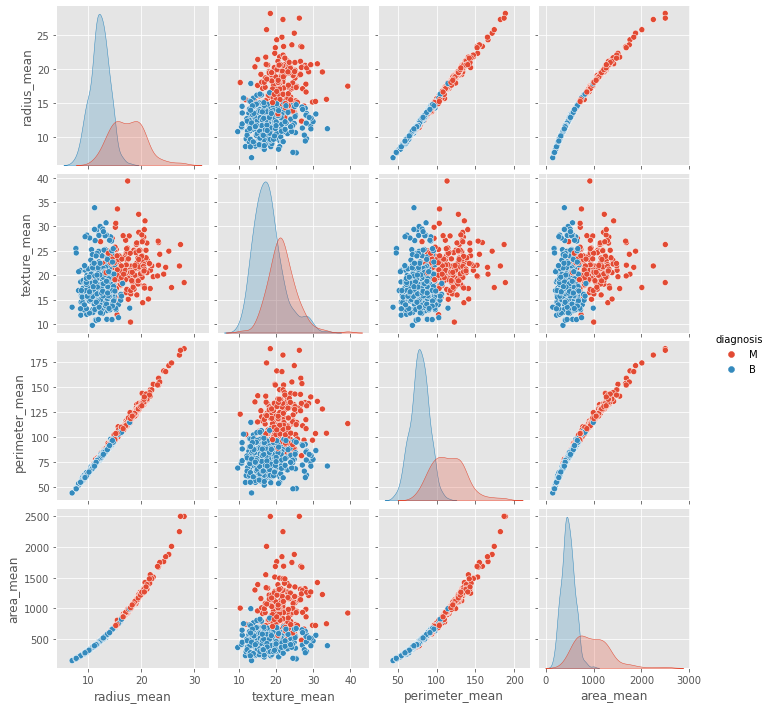

In [27]:
import seaborn as sns
plt.style.use('ggplot')
sns.pairplot(dataset.loc[:, 'diagnosis' : 'area_mean'], hue='diagnosis');

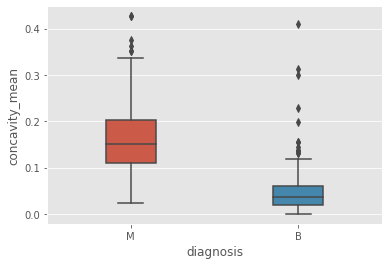

In [28]:
import seaborn as sns
sns.boxplot(y=dataset['concavity_mean'], x=dataset['diagnosis'], width=0.3);

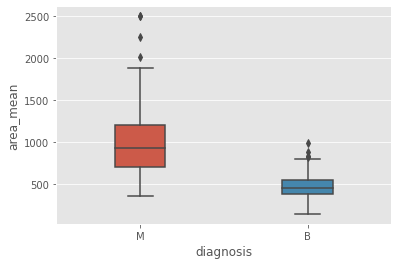

In [29]:
sns.boxplot(y=dataset['area_mean'], x=dataset['diagnosis'], width=0.3)
plt.show();

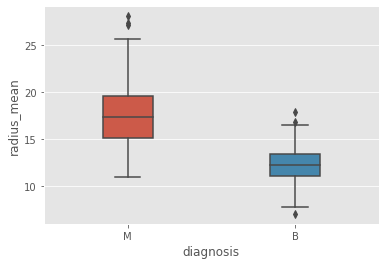

In [30]:
sns.boxplot(y=dataset['radius_mean'], x=dataset['diagnosis'], width=0.3);

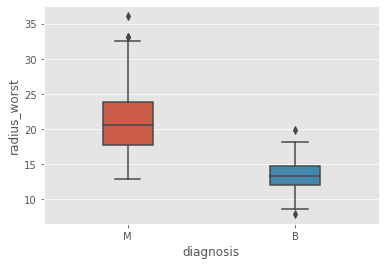

In [31]:
sns.boxplot(y=dataset['radius_worst'], x=dataset['diagnosis'], width=0.3);

In [32]:
dataset['radius_worst'].describe()

count    569.000000
mean      16.269190
std        4.833242
min        7.930000
25%       13.010000
50%       14.970000
75%       18.790000
max       36.040000
Name: radius_worst, dtype: float64

In [33]:
dataset.groupby('diagnosis').radius_mean.agg(
    radius_min=('min'), 
    radius_max=('max'), 
)

,radius_min,radius_max
diagnosis,,
B,6.981,17.85
M,10.950,28.11


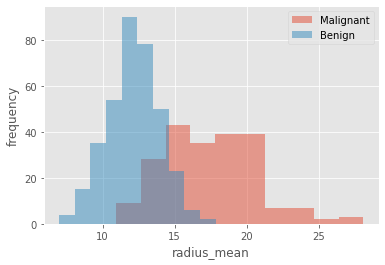

In [37]:
plt.hist(dataset['radius_mean'][dataset['diagnosis'] == 'M'],
         bins=10, alpha=0.5, label='Malignant')
plt.hist(dataset['radius_mean'][dataset['diagnosis'] == 'B'],
         bins=10, alpha=0.5, label='Benign')
plt.xlabel('radius_mean')
plt.ylabel('frequency')
plt.legend(loc='upper right')                       

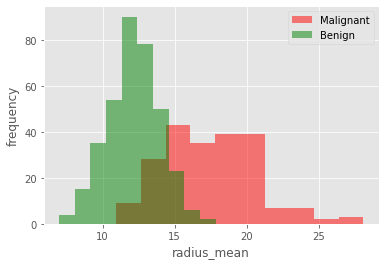

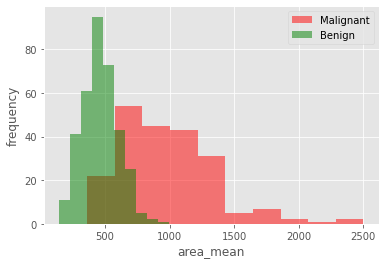

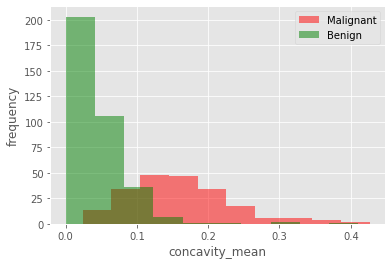

In [38]:
for i in ('radius_mean', 'area_mean', 'concavity_mean'):
  plt.hist(dataset[i][dataset['diagnosis'] =='M'], bins=10, alpha=0.5, color='red', label='Malignant')
  plt.hist(dataset[i][dataset['diagnosis'] =='B'], bins=10, alpha=0.5, color='green', label='Benign')
  plt.xlabel(i)
  plt.ylabel('frequency')
  plt.legend(loc='upper right')
  plt.show()

In [39]:
new_data_B=dataset[dataset.diagnosis =='B']
new_data_M=dataset[dataset.diagnosis =='M']

Text(0, 0.5, 'mean concavity for benign')

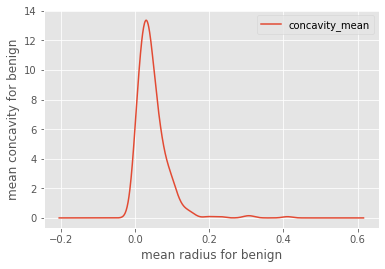

In [40]:
new_data_B.plot(kind='density', x='radius_mean', y = 'concavity_mean')
plt.xlabel('mean radius for benign')
plt.ylabel('mean concavity for benign')

Text(0, 0.5, 'mean concavity for Malignant')

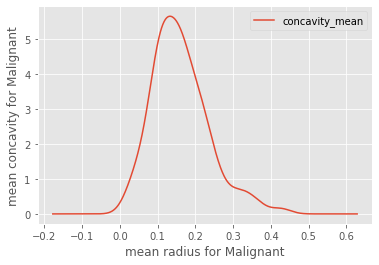

In [41]:
new_data_M.plot(kind='density', x='radius_mean', y = 'concavity_mean')
plt.xlabel('mean radius for Malignant')
plt.ylabel('mean concavity for Malignant')

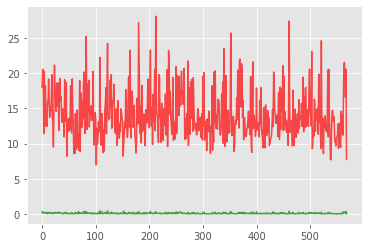

In [42]:
from matplotlib import pyplot as plt
overlapping = 0.7
line1 = plt.plot(dataset['radius_mean'], c='red', alpha=overlapping)
iine2 = plt.plot(dataset['concavity_mean'], c='green', alpha=overlapping)
plt.show()

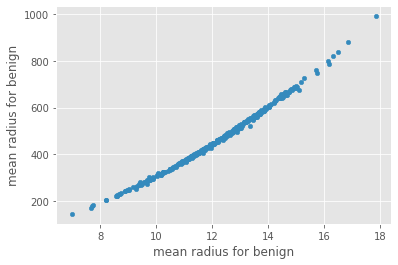

In [43]:
new_data_B.plot(kind='scatter', x='radius_mean', y='area_mean')
plt.xlabel('mean radius for benign')
plt.ylabel('mean radius for benign')
plt.show()

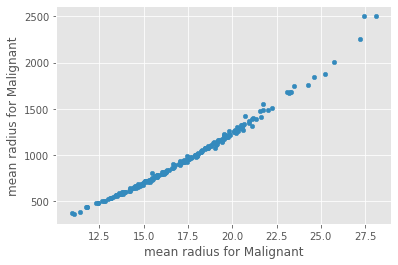

In [44]:
new_data_M.plot(kind='scatter', x='radius_mean', y='area_mean')
plt.xlabel('mean radius for Malignant')
plt.ylabel('mean radius for Malignant')
plt.show()

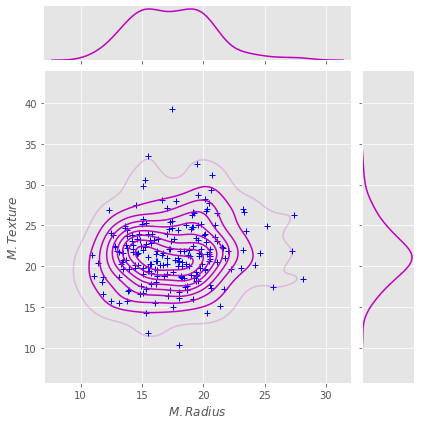

In [46]:
g = sns.jointplot(x=new_data_M['radius_mean'], y=new_data_M['texture_mean'],
                data=new_data_M, kind='kde', color='m')
g.plot_joint(plt.scatter, c='b', s=30, linewidth=1, marker='+')
g.ax_joint.collections[0].set_alpha(0.2)
g.set_axis_labels("$M.Radius$", "$M.Texture$");


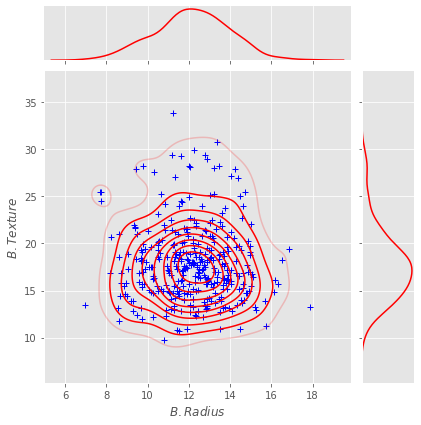

In [48]:
g = sns.jointplot(x=new_data_B['radius_mean'], y=new_data_B['texture_mean'],
                data=new_data_B, kind='kde', color='r')
g.plot_joint(plt.scatter, c='b', s=30, linewidth=1, marker='+')
g.ax_joint.collections[0].set_alpha(0.2)
g.set_axis_labels("$B.Radius$", "$B.Texture$");


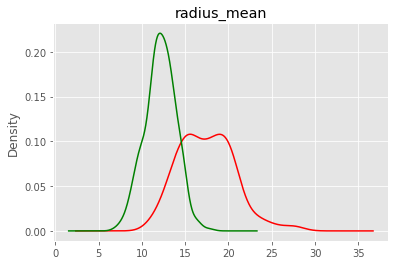

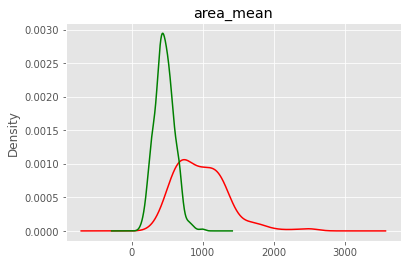

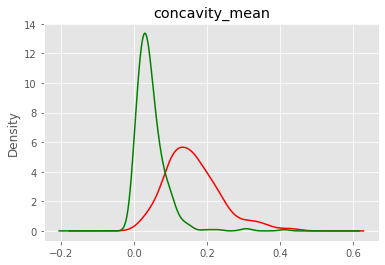

In [52]:
for i in ('radius_mean', 'area_mean', 'concavity_mean',):
  dataset[i][dataset['diagnosis'] =='M'].plot.kde(title = i, c='r')
  dataset[i][dataset['diagnosis'] =='B'].plot.kde(title = i, c='g')
  plt.show()


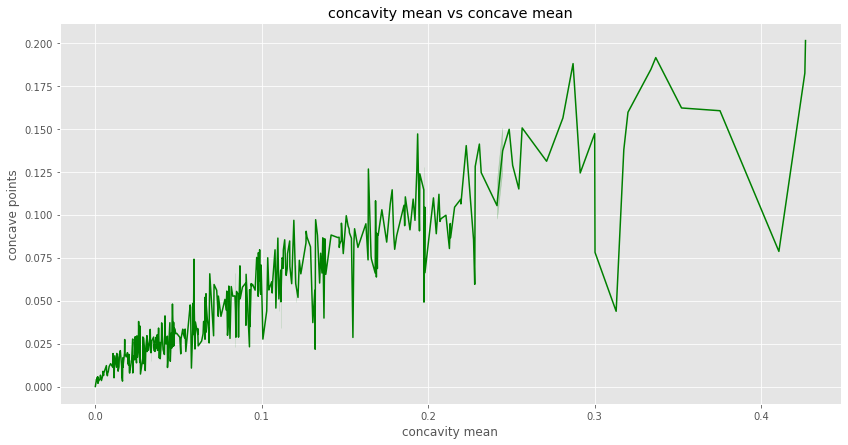

In [58]:
plt.figure(figsize=(14,7))
sns.lineplot(x='concavity_mean', y='concave points_mean',
      data = dataset[0:400], color='green')
plt.title("concavity mean vs concave mean")
plt.xlabel('concavity mean')
plt.ylabel('concave points')
plt.show()

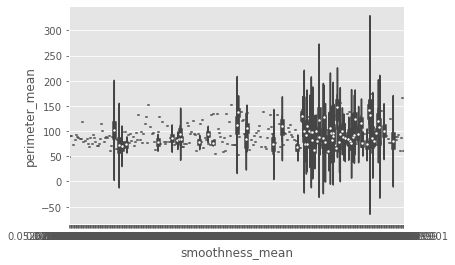

In [59]:
sns.violinplot(x='smoothness_mean', y='perimeter_mean', data=dataset); 

In [60]:
dataset.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


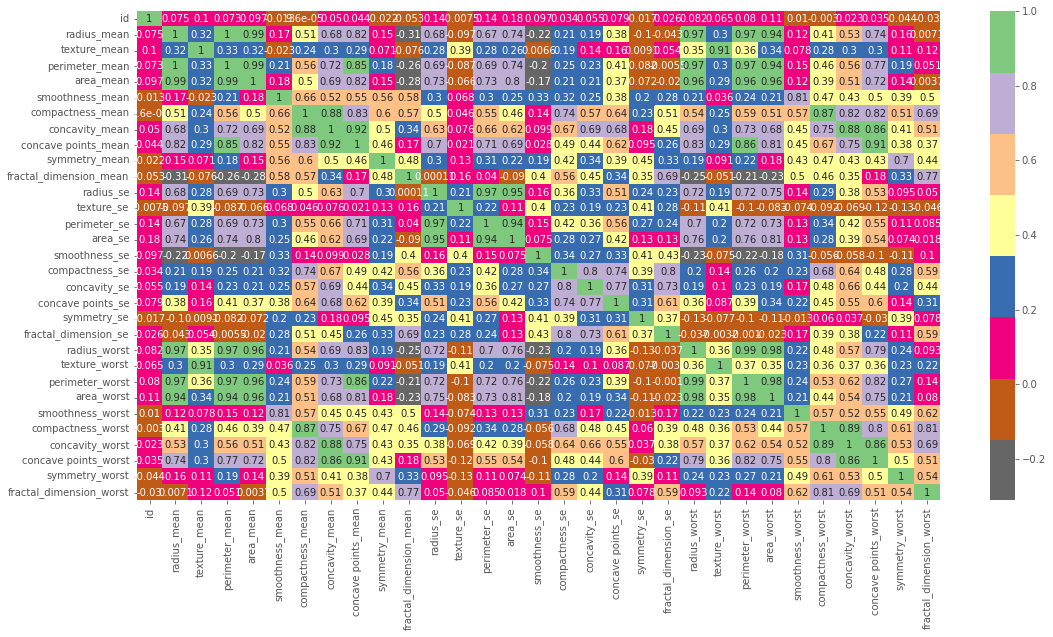

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,9))
sns.heatmap(dataset.corr(), annot=True, cmap='Accent_r');

In [64]:
sns.barplot(x='id', y='diagnosis', data = dataset[160:90])
plt.title('ID vs Diagnosis', fontsize=15)
plt.xlabel('ID')
plt.show()
plt.style.use('ggplot')

ValueError: ignored

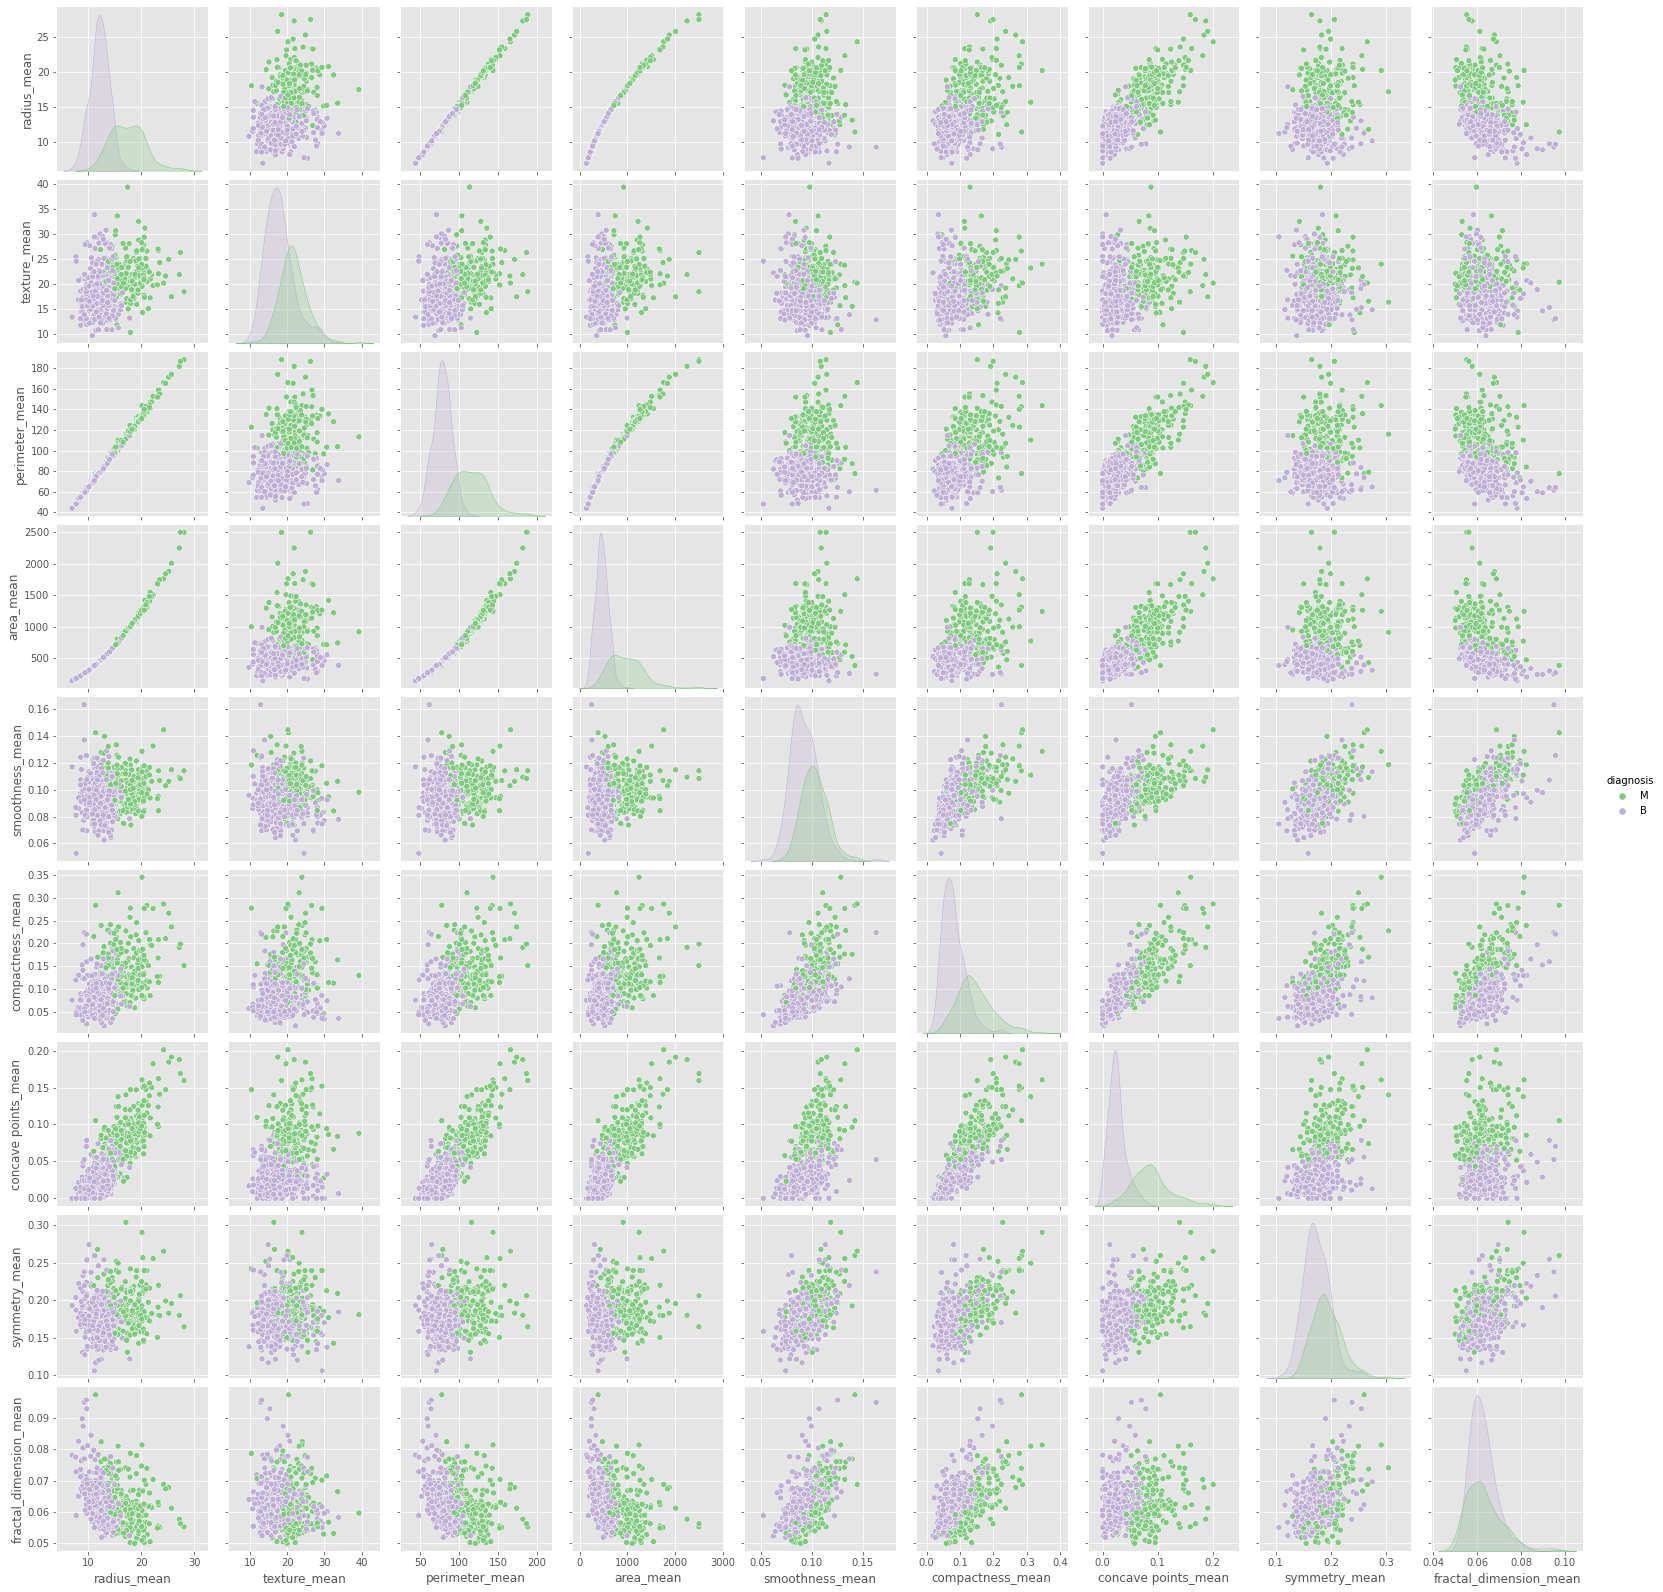

In [66]:
mean_col = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
sns.pairplot(dataset[mean_col],hue = 'diagnosis', palette='Accent')

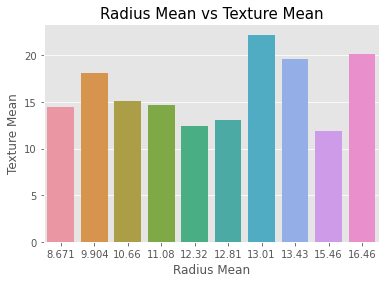

In [63]:
sns.barplot(x='radius_mean', y='texture_mean', data = dataset[170:180])
plt.title('Radius Mean vs Texture Mean', fontsize=15)
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.show()
plt.style.use('ggplot')

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics 
from sklearn.model_selection import train_test_split

In [69]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [70]:
y = dataset['diagnosis']
x = dataset.drop('diagnosis', axis=1)

print ('X= ', x)
print ("Y= ", y)

X=             id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0      842302        17.99  ...          0.4601                  0.11890
1      842517        20.57  ...          0.2750                  0.08902
2    84300903        19.69  ...          0.3613                  0.08758
3    84348301        11.42  ...          0.6638                  0.17300
4    84358402        20.29  ...          0.2364                  0.07678
..        ...          ...  ...             ...                      ...
564    926424        21.56  ...          0.2060                  0.07115
565    926682        20.13  ...          0.2572                  0.06637
566    926954        16.60  ...          0.2218                  0.07820
567    927241        20.60  ...          0.4087                  0.12400
568     92751         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]
Y=  0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
5

In [85]:
from sklearn.preprocessing import LabelEncoder

print ('Before Encoding y:')
print(y)

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

print ('\nAfter Encoding and transform y:')
print(y)


Before Encoding y:
0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

After Encoding and transform y:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

model = LogisticRegression()

model.fit(X_train, y_train)

yhat = model.predict(X_test)

accuracy=accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 58.77


In [86]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(dataset.columns):
  if dataset[i].dtype=='object':
      dataset[i]=le.fit_transform(dataset[i])

In [89]:
y=dataset['diagnosis']
X=dataset.drop('diagnosis', axis=1)

In [91]:
print(y)

print(x)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64
           id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0      842302        17.99  ...          0.4601                  0.11890
1      842517        20.57  ...          0.2750                  0.08902
2    84300903        19.69  ...          0.3613                  0.08758
3    84348301        11.42  ...          0.6638                  0.17300
4    84358402        20.29  ...          0.2364                  0.07678
..        ...          ...  ...             ...                      ...
564    926424        21.56  ...          0.2060                  0.07115
565    926682        20.13  ...          0.2572                  0.06637
566    926954        16.60  ...          0.2218                  0.07820
567    927241        20.60  ...          0.4087                  0.12400
568     92751         7.76  ...          0.2871        

In [110]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [99]:
print(len(X_train))

print (len(X_test))

print (len(y_train))

print (len(y_test))

455
114
455
114


In [101]:
##Machine Learning Models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
list_1=[]
for i in range(1,5):
      knn=KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train, y_train)
      pred_s=knn.predict(X_test)
      scores=accuracy_score(y_test,pred_s)
      list_1.append(scores)

In [102]:
result = format(scores*100, '.2f') + '%'
print(result)

71.05%


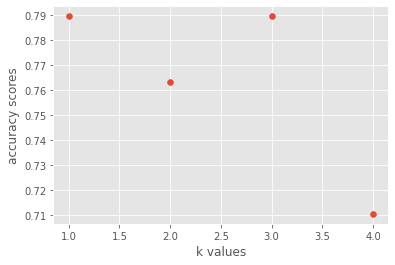

In [103]:
plt.scatter(range(1,5),list_1)
plt.xlabel('k values')
plt.ylabel('accuracy scores')
plt.show()

In [105]:
sns.barplot(x=list(range(1,21)), y=list_1)

ValueError: ignored

In [106]:
print(max(list_1))

0.7894736842105263


In [113]:
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
pred_1=lr.predict(X_test)
score_1=accuracy_score(y_test,pred_1)

In [114]:
score_1

0.5877192982456141

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
list_2=[]
for i in range(1,20):
      lr=LogisticRegression(max_iter=10000)
      lr.fit(X_train, y_train)
      pred_1=lr.predict(X_test)
      score_1=accuracy_score(y_test,pred_1)
      list_2.append(score_1)

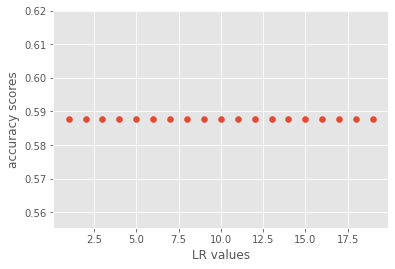

In [120]:
plt.scatter(range(1,20), list_2)
plt.xlabel('LR values')
plt.ylabel('accuracy scores')
plt.show()

In [122]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_2=rfc.predict(X_test)
score_2=accuracy_score(y_test, pred_2)
score_2

0.9649122807017544

In [126]:
from sklearn.ensemble import RandomForestClassifier
list_3=[]
for i in range (1,30):
 rfc=RandomForestClassifier()
 rfc.fit(X_train, y_train)
 pred_2=rfc.predict(X_test)
 score_2=accuracy_score(y_test, pred_2)
 list_3.append(score_2)

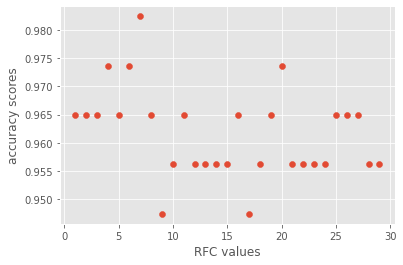

In [127]:
plt.scatter(range(1,30), list_3)
plt.xlabel('RFC values')
plt.ylabel('accuracy scores')
plt.show()

In [128]:
max(list_3)

0.9824561403508771

In [129]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=123)

In [130]:
y_pred=dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ", dtree.score(X_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

[[63  4]
 [ 2 45]]
Training Score:  99.34065934065934


In [131]:
print(accuracy_score(y_test, y_pred)*100)

94.73684210526315


In [132]:
data = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred})
data

,Actual,Predicted
512,1,1
457,0,0
439,0,0
298,0,0
37,0,0
...,...,...
213,1,0
519,0,0
432,1,1
516,1,1


In [141]:
from sklearn.preprocessing import LabelEncoder

labelencoder_Y = LabelEncoder()

Y = labelencoder_Y.fit_transform(Y)


NameError: ignored